In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv('data/Surface_Drinking_Water_Importance__Feature_Layer_.csv')
us_geo = gpd.read_file('images/us_geo.json')

In [13]:
def huc_area(df, lower_lim, upper_lim): # -> dataframe, int, int
    #defines an region with the hydrologic unit code
    #returns a DataFrame with that area
    df_state = df[(df['HUC_12'] >= lower_lim*1000000000) & (df['HUC_12'] < upper_lim*1000000000)]
    return df_state


def pop_total(df, lower_lim, upper_lim): # -> dataframe, int, int
    #returns a population served with the defined region of HUC's
    return df[(df['HUC_12'] >= lower_lim*1000000000) & (df['HUC_12'] < upper_lim*1000000000) & (df['POPSERVED']>0)]


In [14]:
# sum the threaten rows of fire, development and insect/disease 
df['threats_per'] = df['INS_FOR3'] + df['DEV_FOR3'] + df['FIR_FOR3']
threats = df[df['threats_per'] > 0.0]
threat_100_pop = df[(df['threats_per'] >= 100.0) & (df['POPSERVED'] > 0) & (df['POPSERVED'] > 0.0)] #85
threat_150_pop = df[(df['threats_per'] >= 150.0) & (df['POPSERVED'] > 0.0) & df['POPSERVED'] > 0] # 2

threat_100 = df[(df['threats_per'] >= 100.0)] #432
threat_150 = df[(df['threats_per'] >= 150.0)] #27
#to see how many areas need priory for remedy

threat_75_pop = df[(df['threats_per'] >= 75.0) & (df['threats_per'] < 100.0) & df['POPSERVED'] > 0] #50
threat_75 = df[(df['threats_per'] >= 75.0) & (df['threats_per'] < 100.0)] #1070
threat_50to75 = df[(df['threats_per'] >= 50.0) & (df['threats_per'] < 75.0)] #3446
threat_50to75_pop = df[(df['threats_per'] >= 50.0) & (df['threats_per'] < 75.0) & df['POPSERVED'] > 0] #137
threat_50to75_pop

,HUC_12,HU_12_NAME,IMP1,IN_FOR2,IN_PRONF2,IN_NFS2,IN_PRI2,INS_FOR3,DEV_FOR3,FIR_FOR3,...,PER_NFS2,PER_PRI2,PER_INSEC3,PER_DEV3,PER_FIRE3,OBJECTID,POPSERVED,SHAPEAREA,SHAPELEN,threats_per
1024,10500021501,Somes Sound,77,60.83,30.80,0.00,30.80,1.19227,35.90795,26.81386,...,0,40,1.96,59.03,44.08,201665,3755,0.008610,0.773171,63.91408
1035,10500021702,Islands of Stonington Frontal Drainages,62,48.36,9.30,0.00,39.06,2.47120,16.12322,32.99119,...,0,63,5.11,33.34,68.22,201676,713,0.013259,5.130853,51.58561
1129,10700020108,Lake Waukewan-Lake Winnipesaukee,93,71.61,7.44,0.00,64.17,2.93601,47.29841,14.55115,...,0,69,4.10,66.05,20.32,201770,2635,0.003792,0.357076,64.78557
1136,10700030103,Nubanusit Brook,85,70.55,22.95,0.00,48.45,3.55572,43.54346,4.72685,...,0,57,5.04,61.72,6.70,201777,413,0.008665,0.626880,51.82603
1290,10600031101,Branch Brook-Merriland River,91,70.07,10.92,0.00,59.15,1.20520,54.06601,0.00000,...,0,65,1.72,77.16,0.00,201931,29963,0.009007,0.563167,55.27121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76357,171003100205,Bailey Creek-Rogue River,59,51.33,43.66,1.18,7.67,0.00000,7.39152,51.33000,...,2,13,0.00,14.40,100.00,276998,525,0.006946,0.398218,58.72152
77256,180102120204,Big Creek,66,54.12,52.14,52.14,1.98,16.87462,2.05656,54.12000,...,79,3,31.18,3.80,100.00,277897,375,0.007523,0.495219,73.05118
77260,180102120303,Rusch Creek-Hayfork Creek,67,44.22,39.53,38.86,4.69,3.40052,5.47886,44.22000,...,58,7,7.69,12.39,100.00,277901,1125,0.013877,0.793841,53.09938
80612,170603080701,Upper Elk Creek,78,66.30,61.62,55.38,3.90,4.96587,0.92157,54.24003,...,71,5,7.49,1.39,81.81,281253,165,0.012877,0.574243,60.12747


In [15]:
df_co = df[(df['HUC_12'] >= 140000000000) & (df['HUC_12'] < 160000000000) & (df['IMP1'] > 0)]
df_co

,HUC_12,HU_12_NAME,IMP1,IN_FOR2,IN_PRONF2,IN_NFS2,IN_PRI2,INS_FOR3,DEV_FOR3,FIR_FOR3,...,PER_NFS2,PER_PRI2,PER_INSEC3,PER_DEV3,PER_FIRE3,OBJECTID,POPSERVED,SHAPEAREA,SHAPELEN,threats_per
56476,140300030402,McKee Draw,20,15.40,10.80,9.20,4.60,0.00000,1.41372,14.59920,...,46,23,0.00,9.18,94.80,257117,0,0.004777,0.382179,16.01292
56477,140300030403,Callan Draw,21,18.90,15.75,8.82,3.15,1.82196,6.78321,17.39745,...,42,15,9.64,35.89,92.05,257118,0,0.005458,0.436415,26.00262
56478,140300030404,McKee Draw-Naturita Creek,25,22.75,21.75,11.00,1.00,1.72900,0.00000,18.92800,...,44,4,7.60,0.00,83.20,257119,0,0.004728,0.419833,20.65700
56479,140300030405,Headwaters Maverick Draw,54,32.40,5.94,2.70,26.46,0.00000,3.18168,29.21832,...,5,49,0.00,9.82,90.18,257120,1700,0.012474,0.702822,32.40000
56480,140300030406,Outlet Maverick Draw,20,10.40,5.40,0.00,5.00,0.00000,0.32656,10.21696,...,0,25,0.00,3.14,98.24,257121,0,0.006414,0.488174,10.54352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72009,150702030702,Garcia Well-San Cristobal Wash,17,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0.00,0.00,0.00,272650,0,0.011781,0.667886,0.00000
72010,150702030703,Town of Dateland,18,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0.00,0.00,0.00,272651,0,0.008295,0.480567,0.00000
72011,150702030704,Pimeria Well-San Cristobal Wash,18,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0.00,0.00,0.00,272652,0,0.020690,0.868747,0.00000
72012,150702030705,Town of Stoval-San Cristobal Wash,19,0.00,0.00,0.00,0.00,0.00000,0.00000,0.00000,...,0,0,0.00,99.99,0.00,272653,0,0.006717,0.498573,0.00000


In [16]:
pop = df[(df['HUC_12'] >= 140000000000) & (df['HUC_12'] < 160000000000) & (df['POPSERVED']>0)]


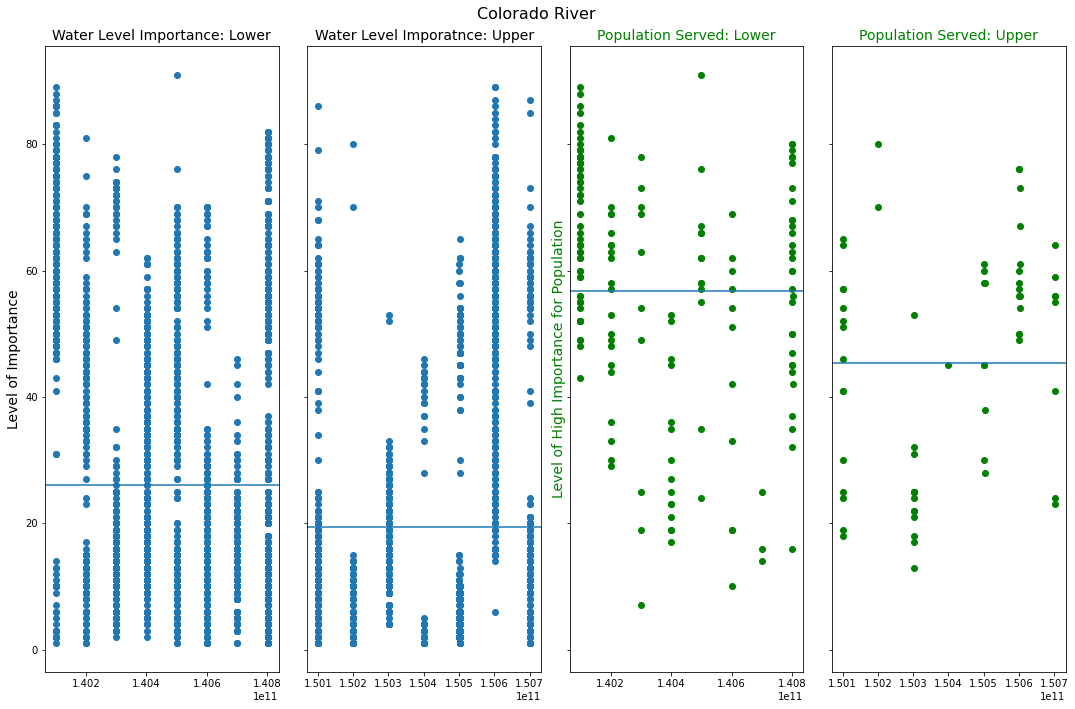

In [17]:
fig, ax = plt.subplots(1, 4, sharey='row', figsize=(15, 10))
df_imp0 = df_co.loc[df_co['HUC_12'] < 150000000000,'IMP1']
df_lower = df_co.loc[df_co['HUC_12'] < 150000000000, 'HUC_12']
df_imp1 = df_co.loc[df_co['HUC_12'] >= 150000000000,'IMP1']
df_upper = df_co.loc[df_co['HUC_12'] >= 150000000000, 'HUC_12']
ax[0].scatter(df_lower, df_imp0)
ax[1].scatter(df_upper, df_imp1)
ax[0].set_title('Water Level Importance: Lower', size=14)
ax[1].set_title('Water Level Imporatnce: Upper', size=14)
ax[0].set_ylabel('Level of Importance', size=14)
co_mean = df_imp0 = df_co.loc[df_co['HUC_12'] < 150000000000,'IMP1'].mean()
co_mean1 = df_imp0 = df_co.loc[df_co['HUC_12'] > 150000000000,'IMP1'].mean()
ax[0].axhline(co_mean)
ax[1].axhline(co_mean1)


df_pop0 = pop.loc[pop['HUC_12'] < 150000000000,'IMP1']
df_lower_pop = pop.loc[pop['HUC_12'] < 150000000000, 'HUC_12']
df_pop1 = pop.loc[pop['HUC_12'] >= 150000000000,'IMP1']
df_upper_pop = pop.loc[pop['HUC_12'] >= 150000000000, 'HUC_12']
ax[2].scatter(df_lower_pop, df_pop0, color='green')
ax[3].scatter(df_upper_pop, df_pop1, color='green')
ax[2].set_title('Population Served: Lower', size=14, color='green')
ax[3].set_title('Population Served: Upper', size=14, color='green')
ax[2].set_ylabel('Level of High Importance for Population', size=14, color='green')
pop_mean = pop.loc[pop['HUC_12'] < 150000000000,'IMP1'].mean()
pop_mean1 = pop.loc[pop['HUC_12'] > 150000000000,'IMP1'].mean()
ax[2].axhline(pop_mean)
ax[3].axhline(pop_mean1)
plt.suptitle('Colorado River', size=16)
plt.tight_layout()



In [18]:
#what's the difference between the importance level and the importance level for the population? 
#Also, how does the forest in these areas with the population served affected by the threats?

In [19]:
def pop_served_graphs_upper_lower(mid_lim, name_label, label1, label2, pop, huc_area): 
    #range of ints to set the graphs for starting - iterate over HUC's in the data. 
    fig, ax = plt.subplots(1, 4, sharey='row', figsize=(15, 10))
    df_imp0 = huc_area.loc[huc_area['HUC_12'] < mid_lim*1000000000,'IMP1']
    df_lower = huc_area.loc[huc_area['HUC_12'] < mid_lim*1000000000, 'HUC_12']
    df_lower = huc_area.loc[huc_area['HUC_12'] < mid_lim*1000000000, 'HUC_12']
    df_imp1 = huc_area.loc[huc_area['HUC_12'] >= mid_lim*1000000000,'IMP1']
    df_upper = huc_area.loc[huc_area['HUC_12'] >= mid_lim*1000000000, 'HUC_12']
    ax[0].scatter(df_lower, df_imp0)
    ax[1].scatter(df_upper, df_imp1)
    ax[0].set_title('Water Level Importance: {}'.format(label1), size=14)
    ax[1].set_title('Water Level Imporatnce: {}'.format(label2), size=14)
    ax[0].set_ylabel('Level of Importance', size=14)
    co_mean = df_imp0 = df_co.loc[df_co['HUC_12'] < mid_lim*1000000000,'IMP1'].mean()
    co_mean1 = df_imp0 = df_co.loc[df_co['HUC_12'] > mid_lim*1000000000,'IMP1'].mean()
    ax[0].axhline(co_mean)
    ax[1].axhline(co_mean1)


    df_pop0 = pop.loc[pop['HUC_12'] < mid_lim*1000000000,'IMP1']
    df_lower_pop = pop.loc[pop['HUC_12'] < mid_lim*1000000000, 'HUC_12']
    df_pop1 = pop.loc[pop['HUC_12'] >= mid_lim*1000000000,'IMP1']
    df_upper_pop = pop.loc[pop['HUC_12'] >= mid_lim*1000000000, 'HUC_12']
    ax[2].scatter(df_lower_pop, df_pop0, color='green')
    ax[3].scatter(df_upper_pop, df_pop1, color='green')
    ax[2].set_title('Population Served: {}'.format(label1), size=14, color='green')
    ax[3].set_title('Population Served: {}'.format(label2), size=14, color='green')
    ax[2].set_ylabel('Level of High Importance for Population', size=14, color='green')
    pop_mean = pop.loc[pop['HUC_12'] < mid_lim*1000000000,'IMP1'].mean()
    pop_mean1 = pop.loc[pop['HUC_12'] > mid_lim*1000000000,'IMP1'].mean()
    ax[2].axhline(pop_mean)
    ax[3].axhline(pop_mean1)
    plt.suptitle(name_label, size=16)
    plt.tight_layout()
    ax

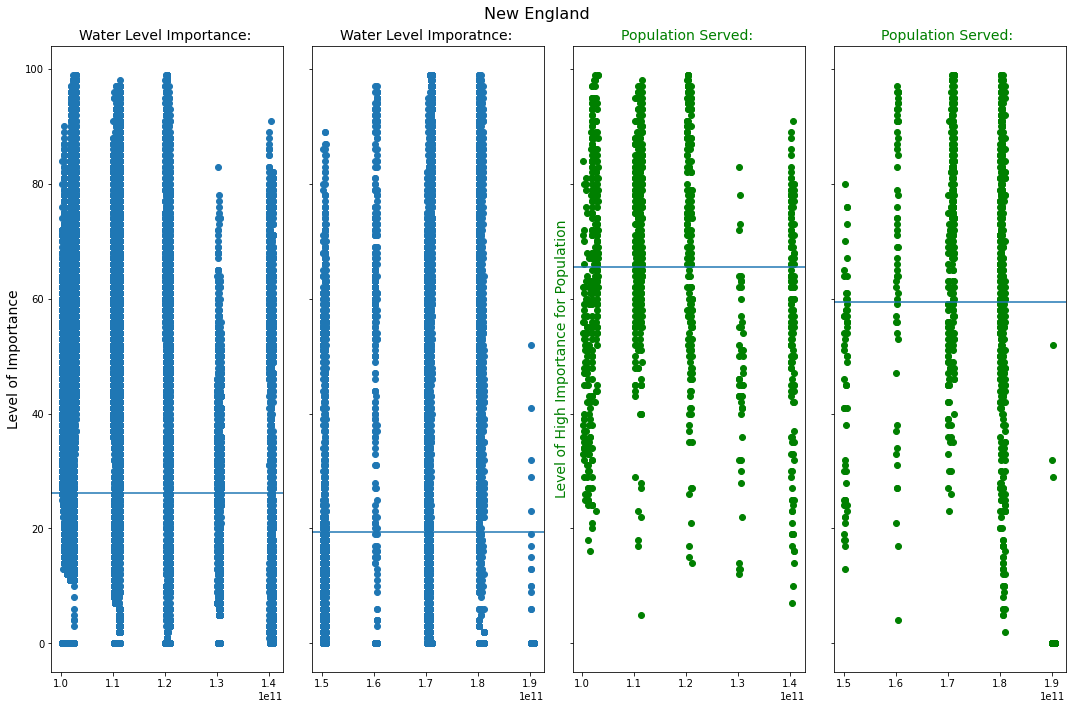

In [20]:
huc_new_england = huc_area(df, 100, 200)
new_england_pop = pop_total(df, 100, 200)
pop_served_graphs_upper_lower(150, 'New England', '', '', new_england_pop, huc_new_england)

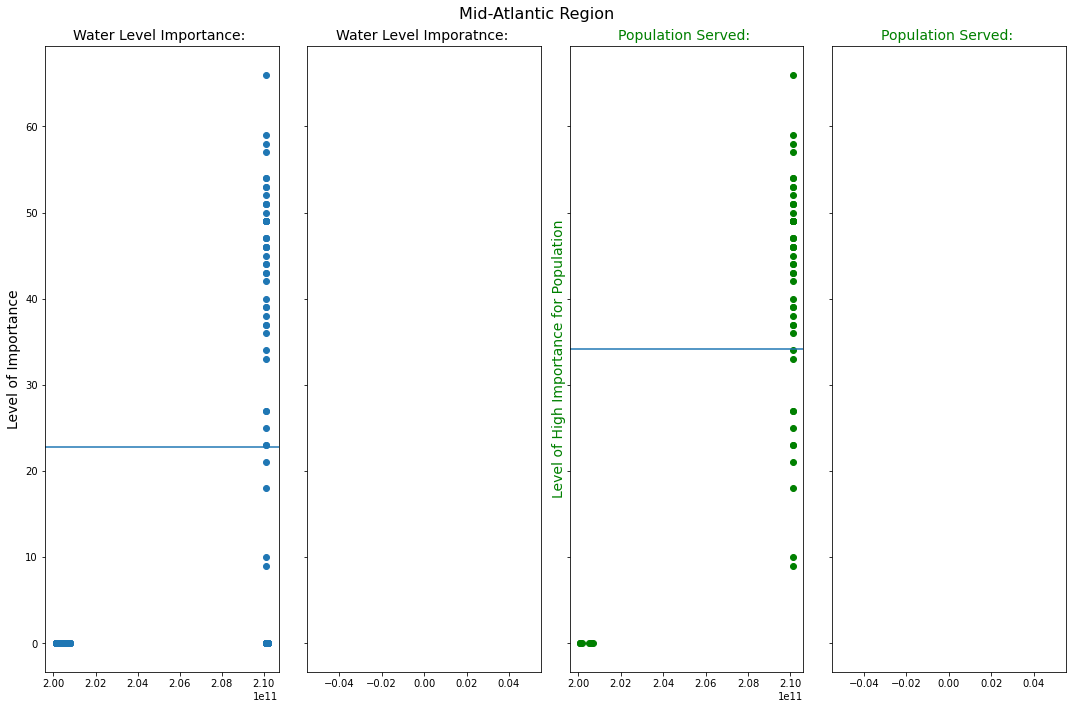

In [21]:
huc_mid_atl = huc_area(df, 200, 300)
mid_atl_pop = pop_total(df, 200, 300)
pop_served_graphs_upper_lower(250, 'Mid-Atlantic Region', '', '', mid_atl_pop, huc_mid_atl)

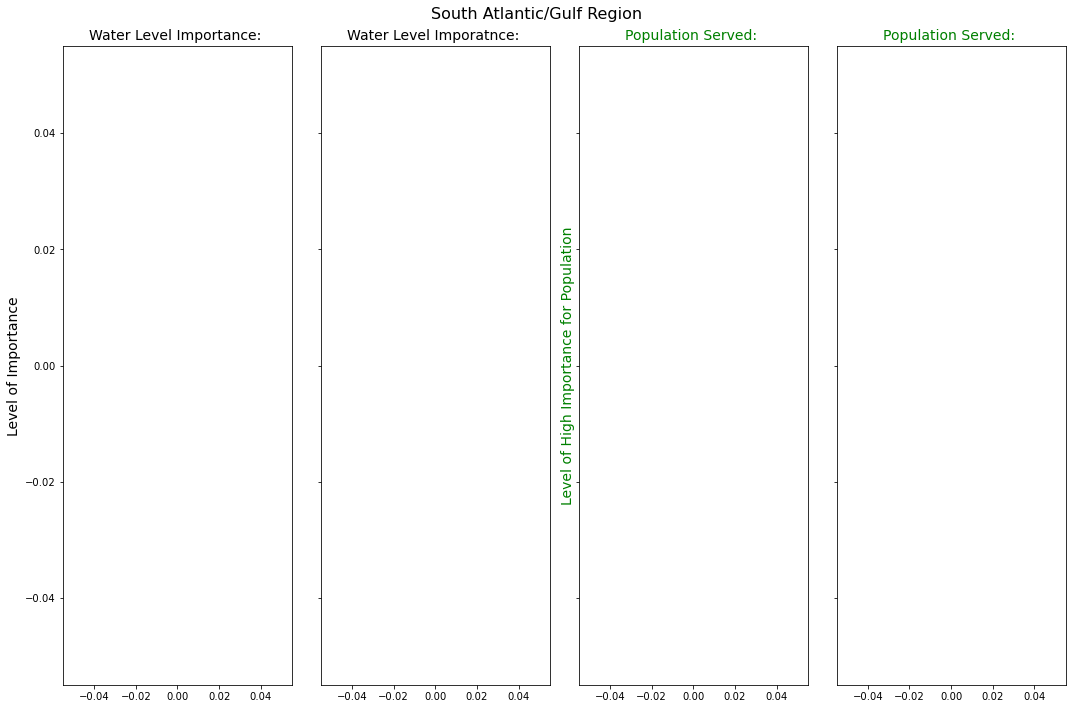

In [25]:
huc_satl_gulf = huc_area(df, 300, 400)
satl_gulf_pop = pop_total(df, 300, 400)
pop_served_graphs_upper_lower(350, 'South Atlantic/Gulf Region', '', '', satl_gulf_pop, huc_satl_gulf)

In [27]:
huc_satl_gulf 

,HUC_12,HU_12_NAME,IMP1,IN_FOR2,IN_PRONF2,IN_NFS2,IN_PRI2,INS_FOR3,DEV_FOR3,FIR_FOR3,...,PER_NFS2,PER_PRI2,PER_INSEC3,PER_DEV3,PER_FIRE3,OBJECTID,POPSERVED,SHAPEAREA,SHAPELEN,threats_per
